# 1. Convert RF signal to RF image

In [1]:
import os
import glob
from utils_inference import signal_to_image, inference

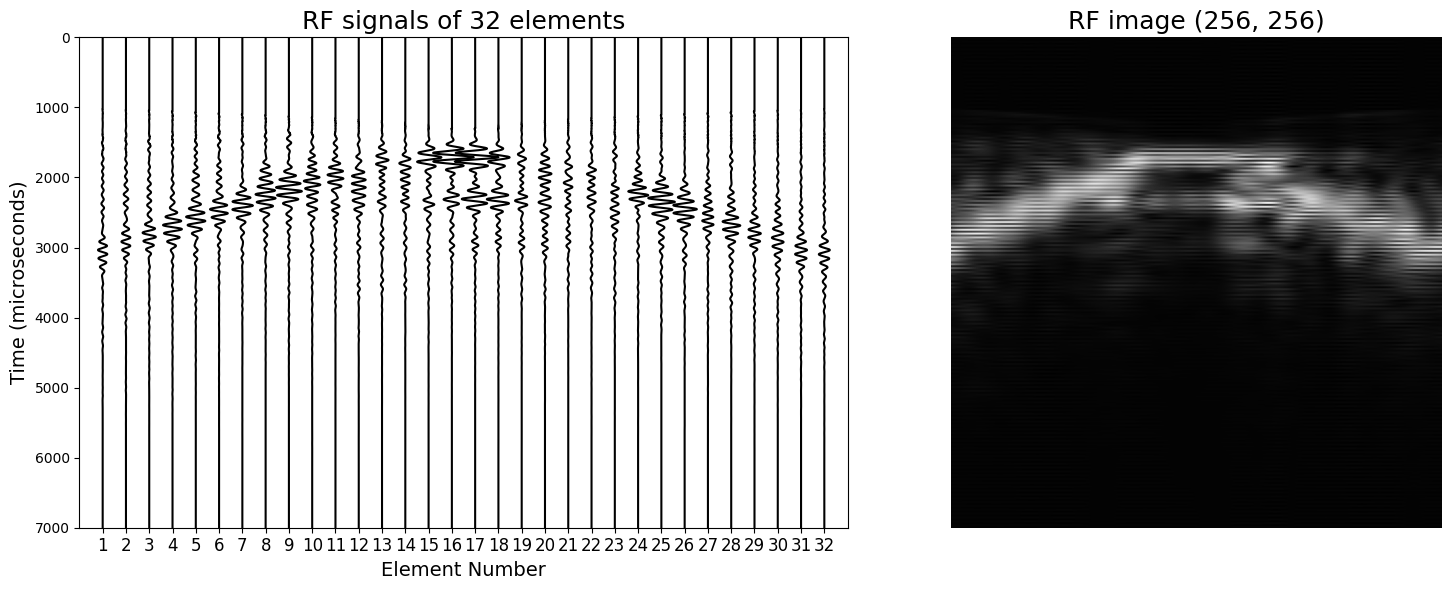

In [3]:
rfsignal_path = "" # File path to the csv file of RF signal
rfimage = signal_to_image(rfsignal_path, figure=True)

---
# 2. Load pre-trained models and Run inference
- "DenseNet" for US array shape estimation
- "DenseUNet (DenseNet Encoder + UNet Decoder)" for skull shape segmentation

In [4]:
import torch

In [5]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class Args:
    def __init__(self):
        self.device = device 
        self.DenseNet_path = None # File path to the pre-trained DenseNet model.
        self.Hybrid_DenseNet_UNet_path = None # File path to the pre-trained Hybrid DenseNet-UNet model.
        self.array_csv_path = None # File path to the CSV file containing medoid and cluster information.

config = Args()
config.DenseNet_path = ""
config.Hybrid_DenseNet_UNet_path = ""
config.array_csv_path = ""

Using device: mps


!!! Using MPS - Converted input to float32 for compatibility !!!
Size of 'tensor_image' = torch.Size([1, 1, 256, 256])
!!! Model parameters are in float32 instead of float64 for MPS compatibility !!!
!!! Dense_UNet model parameters are in float32 for MPS compatibility !!!
Predicted class = 3


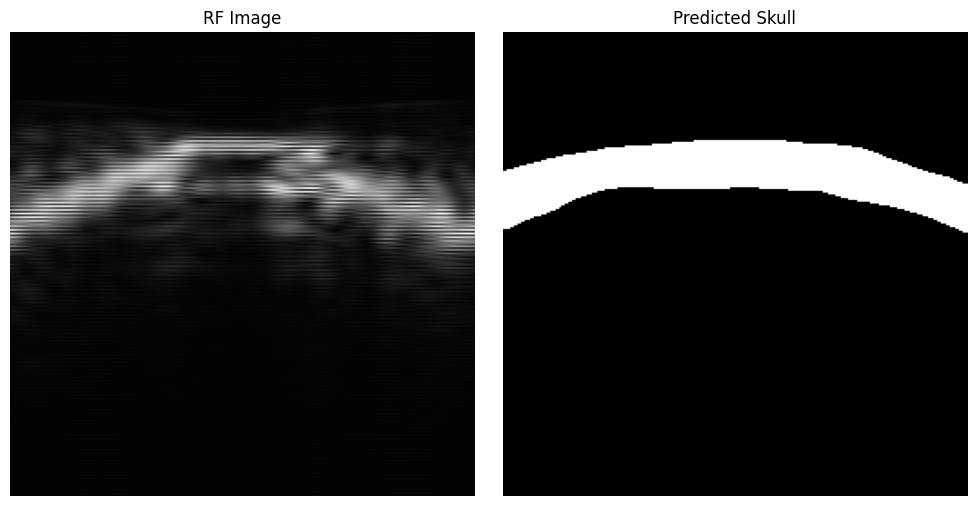

In [7]:
predicted_array_position, predicted_skull = inference(rfimage, config)